This notebook will be used to add frequently used Python concepts -> 
Have connected this from docs, tutorials and mistakes made during coding 

## Contents
- Changing Python Kernal to a virtual environment
- Loading documentation for a class/fuction in jupyter
- Zip (and unzip)


## changing python kernel to a virtual environment 
1. activate your virtual env 
__source  venv/bin/activate__
2. install ipykernel
__pip install ipykernel__
3. install a new kernel 
__ipython kernel install --user --name=tf_pytorch__
4. relaunch jupyter
__jupyter notebook__
5. Switch to a new kernel : __tf_pytorch__

In [18]:
# to load the definition of a class/function in jupyter -> add ?? (or ? for code and no docs) and execute
# other jupyter trips and tricks : https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/
# eg for documentation on log_loss method in sklearn
import pandas as pd
from sklearn.metrics import log_loss
log_loss?


Signature:
log_loss(
    y_true,
    y_pred,
    *,
    eps=1e-15,
    normalize=True,
    sample_weight=None,
    labels=None,
)
Docstring:
Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression
and extensions of it such as neural networks, defined as the negative
log-likelihood of a logistic model that returns ``y_pred`` probabilities
for its training data ``y_true``.
The log loss is only defined for two or more labels.
For a single sample with true label yt in {0,1} and
estimated probability yp that yt = 1, the log loss is

    -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

Read more in the :ref:`User Guide <log_loss>`.

Parameters
----------
y_true : array-like or label indicator matrix
    Ground truth (correct) labels for n_samples samples.

y_pred : array-like of float, shape = (n_samples, n_classes) or (n_samples,)
    Predicted probabilities, as returned by a classifier's
    predict_proba method. If ``y_p

In [32]:
# Pandas Tips

# to convert df to numpy

import pandas as pd
df = pd.read_csv("sample_text_label.csv")
print(df)

#convert to numpy but exclude index

labels = df["label"].to_numpy()
text = df["text"].to_numpy()
print(labels)
print(text)

   text  label
0  aaaa      0
1  bbbb      1
2  cccc      1
3  dddd      0
4  eeee      0
[0 1 1 0 0]
['aaaa' 'bbbb' 'cccc' 'dddd' 'eeee']


## Zip Function 
- Built-in function
- defined as __zip(*iterables)__
- input -> Iterables , output -> iterators 
- can combine zip with sort , sorted, dict
- returns an iterator, yields tuples on demand and can be traversed once only

### How to unzip ?
- No unzip function provided
- use zip with a unzip param * - unpacking operator
- zip(*) 

In [15]:
numbers = [1,2,3]
letters = ['a','b','c']
zipped = zip(numbers, letters)
print(zipped)
print(type(zipped))
print(list(zipped))

pairs = list(zipped)
print(type(pairs))
print ("this will be empty")
print(pairs)

pairs2 = [(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]
nums, letters = zip(*pairs2)
print(type(nums))
print(nums)
print(letters)

<class 'zip'>
[(1, 'a'), (2, 'b'), (3, 'c')]
<class 'list'>
this will be empty
[]
<class 'tuple'>
(1, 2, 3, 4)
('a', 'b', 'c', 'd')


In [26]:
print("We can use PosixPath to look at dir paths and have ls as a common command\n")
import os
from pathlib import Path
Path.ls = lambda x: list(x.iterdir())
path = Path(".")
# shortcut
print("shortcut")
print(path.ls())
# expanded
print("exapnded")
print([x for x in path.iterdir()])

# can be used with os
print("can be combined with os")
print(os.fspath(path))

We can use PosixPath to look at dir paths and have ls as a common command

shortcut
[PosixPath('.ipynb_checkpoints'), PosixPath('Fast-text notes.ipynb'), PosixPath('Tensorflow notes.ipynb'), PosixPath('PyTorch and Huggingface Notes.ipynb'), PosixPath('Python notes.ipynb')]
exapnded
[PosixPath('.ipynb_checkpoints'), PosixPath('Fast-text notes.ipynb'), PosixPath('Tensorflow notes.ipynb'), PosixPath('PyTorch and Huggingface Notes.ipynb'), PosixPath('Python notes.ipynb')]
can be combined with os
.


Loading images - use PIL libraries


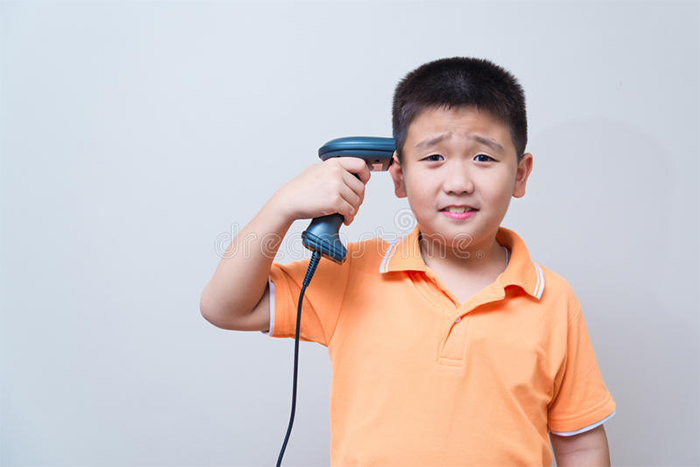

In [35]:
print("Loading images - use PIL libraries")
import PIL
from PIL import Image
img_address = Path("../data/stock_image.jpg")
img = PIL.Image.open(img_address)
img

PosixPath('../data/stock_image.jpg')